<a href="https://colab.research.google.com/github/tusharsgaidhane/Retail_Sales_Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

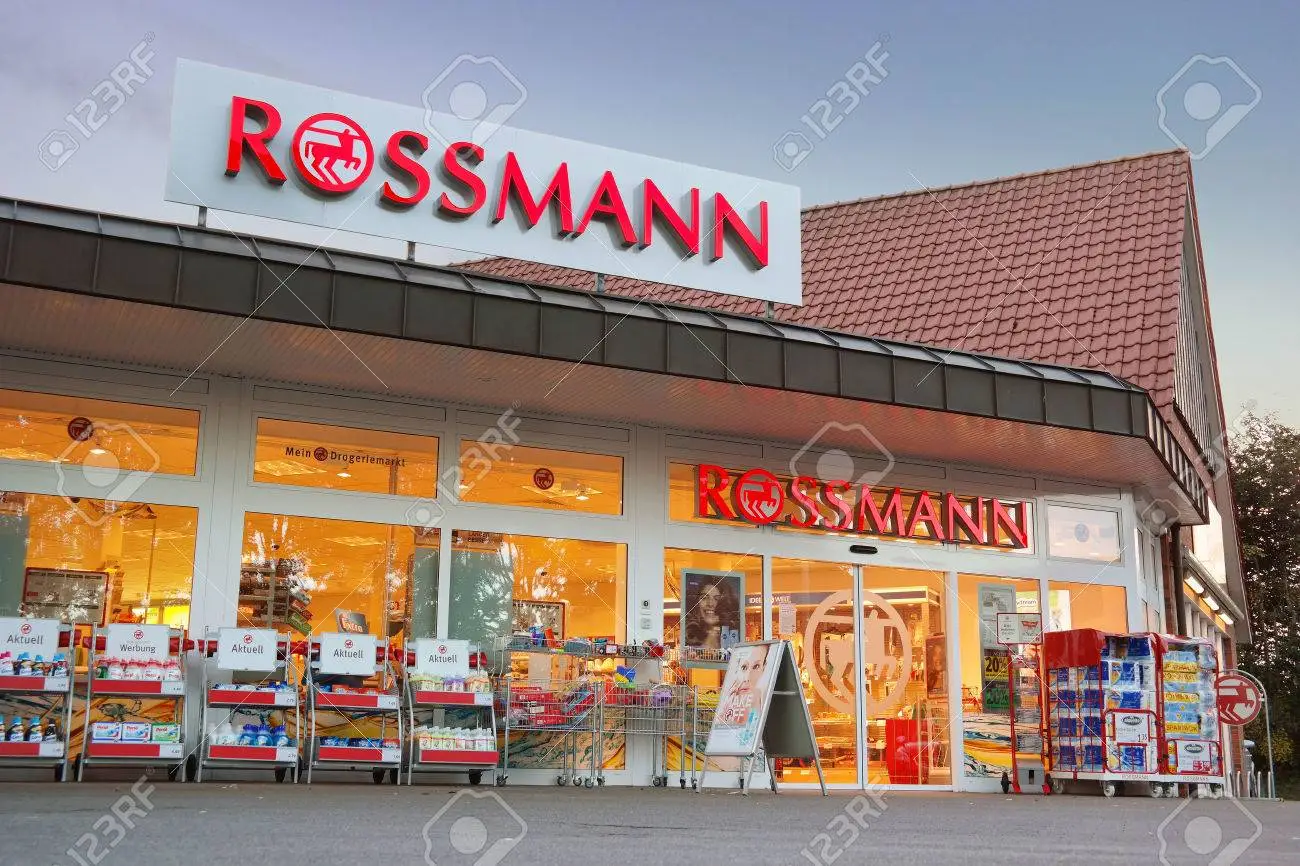

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#preprocessing
# from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor


# Modelling Helpers
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae
import math

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
stores_data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/2. S. ML Regrn: Retail SAles Prediction/Rossmann Stores Data.csv')
stores = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/2. S. ML Regrn: Retail SAles Prediction/store.csv')

### Understanding Data

We have two datasets - "stores_data" and "stores". Let's try to understand the basics of the two datasets. At first we will analyze the "stores_data" and after that we will look into the "stores" data.

### 1. Stores_data

In [5]:
print('Shape of stores_data:', stores_data.shape)


Shape of stores_data: (1017209, 9)


In [6]:
stores_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
stores_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
stores_data['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [10]:
stores_data['DayOfWeek'].value_counts()


5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

In [11]:
stores_data['Open'].unique()

array([1, 0])

In [12]:
print('Open:\n', stores_data['Open'].value_counts(), '\n\n')
print('Promo\n', stores_data['Promo'].value_counts(), '\n\n')
print('State Holiday\n', stores_data['StateHoliday'].value_counts(), '\n\n')
print('School Holiday\n', stores_data['SchoolHoliday'].value_counts())

Open:
 1    844392
0    172817
Name: Open, dtype: int64 


Promo
 0    629129
1    388080
Name: Promo, dtype: int64 


State Holiday
 0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64 


School Holiday
 0    835488
1    181721
Name: SchoolHoliday, dtype: int64


We can see that there is something odd in data in "StateHoliday" column. Let's check it.

In [13]:
stores_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [14]:
stores_data['StateHoliday'] = stores_data['StateHoliday'].apply(lambda x: 0 if x == '0' else x)
stores_data['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

### Let's check how many stores are open and closed on State holidays:


In [15]:
df1 = stores_data.groupby(["StateHoliday", 'Open'])

In [16]:
# Number of stores those were open and closed on state holidays:
df1['Open'].value_counts().to_frame()

Open
StateHoliday Open Open        
0            0    0     142677
             1    1     843482
a            0    0      19566
             1    1        694
b            0    0       6545
             1    1        145
c            0    0       4029
             1    1         71

In [17]:
# Let's check the total sale of the stores open on state holidays:
df2 = df1['Open', 'Sales'].sum()
df2

Open       Sales
StateHoliday Open                    
0            0          0           0
             1     843482  5865164768
a            0          0           0
             1        694     5890305
b            0          0           0
             1        145     1433744
c            0          0           0
             1         71      691806

In [18]:
df3 = df2[df2["Open"] != 0]
df3

,,Open,Sales
StateHoliday,Open,,
0,1,843482,5865164768
a,1,694,5890305
b,1,145,1433744
c,1,71,691806


In [19]:
# Let's find out the total sale of store which were open:
t1 = df3['Sales'].sum()

# Let us compare with sum of sales in stores data to verify whether it is correct or not.
t2 = stores_data['Sales'].sum()
print(t1,',', t2)

5873180623 , 5873180623


In [20]:
# Percentage sale of different types of stores:
total = df3['Sales'].sum()
sale_a = ((5890305)/total)*100
sale_b = ((1433744)/total)*100
sale_c = ((691806)/total)*100
sale_a, sale_b, sale_c

(0.10029156905089788, 0.024411713039869845, 0.011779069032728436)

### We can see that even though the sale on state-holiday type b is almost double of the sale on state-holiday type c, and the sale on state-holiday type a is almost 4 times the sale on state-holiday type b, but **There is no significant difference in the percentage of sales of state holiday type a, b and c as compared to themselves and to total sales.** So, we can treat different types of stateholidays in same way. Thus we can **replace state holiday type a, b & c by 1** only.

The feature StateHoliday changed into a boolean variable. The value {a, b, c} became 1, other 0;

In [21]:
stores_data.StateHoliday.replace({'0' : 0,
                            'a' : 1,
                            'b' : 1,
                            'c' : 1}, inplace=True)


In [22]:
print('State Holiday\n', stores_data['StateHoliday'].value_counts())

State Holiday
 0    986159
1     31050
Name: StateHoliday, dtype: int64


In [23]:
stores_data['SchoolHoliday'].unique()

array([1, 0])

In [24]:
# stores_data.isna().sum()

In [25]:
# dealing with the date-time in data:

stores_data["Date"]=pd.to_datetime(stores_data["Date"])
stores_data["Year"]=stores_data["Date"].dt.year
stores_data["Month"]=stores_data["Date"].dt.month
stores_data["Day"]=stores_data["Date"].dt.day
stores_data["Week"]=stores_data["Date"].dt.week%4
stores_data["WeekOfYear"]=stores_data["Date"].dt.week
stores_data['Quarter'] = stores_data['Date'].dt.quarter



In [26]:
stores_data.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,Quarter
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,31,3
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,3,31,3
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,3,31,3
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,3,31,3
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,3,31,3
5,6,5,2015-07-31,5651,589,1,1,0,1,2015,7,31,3,31,3
6,7,5,2015-07-31,15344,1414,1,1,0,1,2015,7,31,3,31,3
7,8,5,2015-07-31,8492,833,1,1,0,1,2015,7,31,3,31,3
8,9,5,2015-07-31,8565,687,1,1,0,1,2015,7,31,3,31,3
9,10,5,2015-07-31,7185,681,1,1,0,1,2015,7,31,3,31,3


### 2. Stores

In [27]:
print('Shape of stores:', stores.shape)

Shape of stores: (1115, 10)


In [28]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [29]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [30]:
stores.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


Distance from nearest competitor is never equal to 0 with min 20, max is 75860 free.
I suspect that the min 1900 at the opening time of a competitor's store is an error. For continuous promotions conducted in stores, the mean is 0.5, and only half of them are being promoted.

In [31]:
stores['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [32]:
stores['CompetitionOpenSinceYear'].value_counts()

2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2009.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1961.0     1
1900.0     1
1998.0     1
Name: CompetitionOpenSinceYear, dtype: int64

Most of the year of opening of competitive stores is between 1990 and 2014, but there is one each in 1900 and 1961. An error or suspicious value.


In [33]:
# Let's replace 1900 & 1961 in 'CompetitionOpenSinceYear' column by mode value:
stores.CompetitionOpenSinceYear.replace(1900, int(stores.CompetitionOpenSinceYear.mode()[0]), inplace=True)
stores.CompetitionOpenSinceYear.replace(1961, int(stores.CompetitionOpenSinceYear.mode()[0]), inplace=True)

In [34]:
int(stores.CompetitionOpenSinceYear.mode()[0])

2013

##Filling NA Values

In [35]:
# Null Values in 'Competition Distance' column:
stores['CompetitionDistance'].isnull().sum()

3

In [36]:
stores[stores['CompetitionDistance'].isnull()]


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [37]:
# Average competition distance between stores:
stores['CompetitionDistance'].mean()

5404.901079136691

In [38]:
# Let's fill the null values in 'CompetitionDistance' column by mean competition distance:
stores['CompetitionDistance'].fillna(stores['CompetitionDistance'].mean(), inplace = True)

In [39]:
stores.iloc[290]

Store                                291
StoreType                              d
Assortment                             a
CompetitionDistance          5404.901079
CompetitionOpenSinceMonth            NaN
CompetitionOpenSinceYear             NaN
Promo2                                 0
Promo2SinceWeek                      NaN
Promo2SinceYear                      NaN
PromoInterval                        NaN
Name: 290, dtype: object

In [40]:
stores.CompetitionOpenSinceMonth.value_counts()

9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: CompetitionOpenSinceMonth, dtype: int64

In [41]:
# Let's fill remaining NA values with zero:
stores.CompetitionOpenSinceMonth.fillna(0, inplace=True)
stores.CompetitionOpenSinceYear.fillna(0, inplace=True)
stores.Promo2SinceWeek.fillna(0, inplace=True)
stores.Promo2SinceYear.fillna(0, inplace=True)
stores.PromoInterval.fillna(0, inplace=True)

In [42]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## Basic EDA
Let's perform some basic EDA

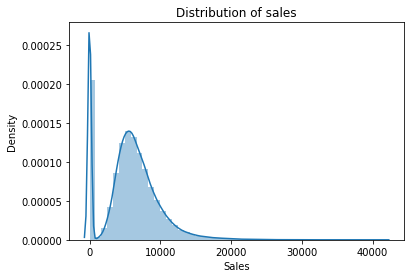

In [43]:
# distribution of Sales has a very long tail

plt.title("Distribution of sales")
sns.distplot(stores_data['Sales'])
plt.show()

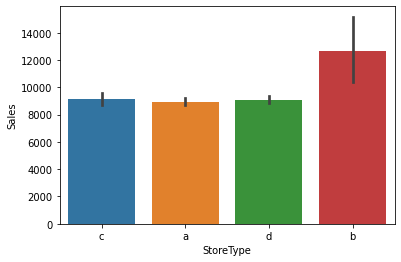

In [44]:
sns.barplot(x = stores['StoreType'], y = stores_data['Sales'])
plt.show()

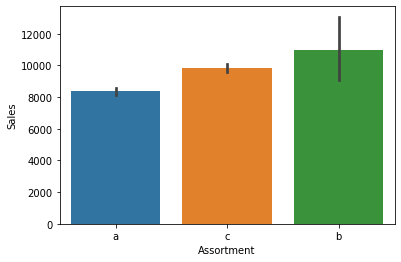

In [45]:
sns.barplot(x = stores['Assortment'], y = stores_data['Sales'])
plt.show()

###Promo VS sales


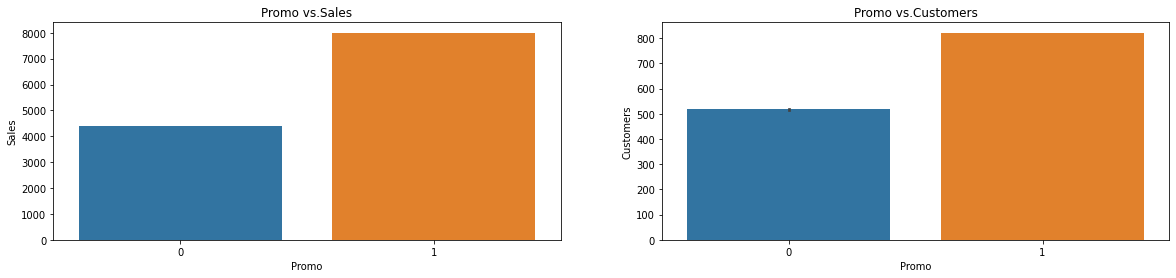

In [46]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,4))

axis1.title.set_text('Promo vs.Sales')
axis2.title.set_text('Promo vs.Customers')
sns.barplot(x='Promo', y='Sales', data=stores_data, ax=axis1)
sns.barplot(x='Promo', y='Customers', data=stores_data, ax=axis2)

Here we observe that sales and customers increase significantly during promotions. This shows that the promotion has a positive effect for a store.

###Sales Vs Holidays

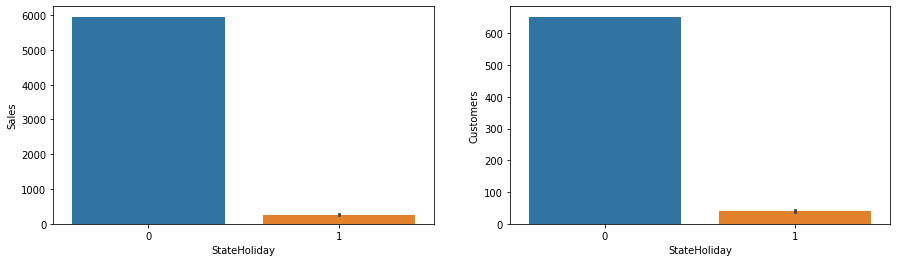

In [47]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StateHoliday', y='Sales', data= stores_data, ax=axis1)
sns.barplot(x='StateHoliday', y='Customers', data= stores_data, ax=axis2)

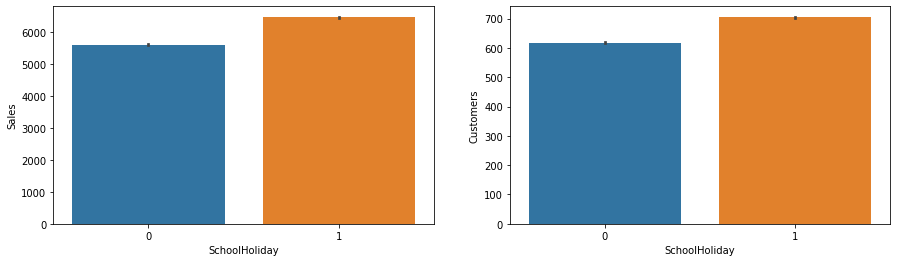

In [48]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='SchoolHoliday', y='Sales', data= stores_data, ax=axis1)
sns.barplot(x='SchoolHoliday', y='Customers', data= stores_data, ax=axis2)

###Week days effect

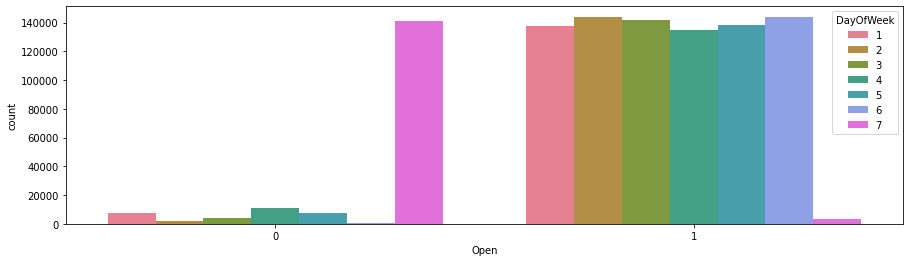

In [49]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=stores_data,palette="husl", ax=axis1)

This clearly shows that most shops remain closed on Sundays. Some stores were also closed on weekdays, this may be due to public holidays, as stores are usually closed on public holidays and open during school vacations.

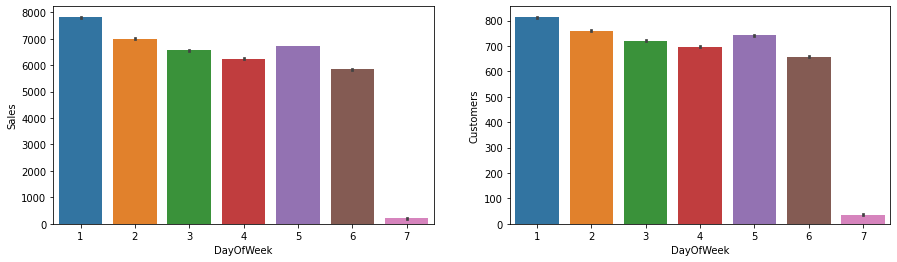

In [50]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=stores_data, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=stores_data, order=[1,2,3,4,5,6,7], ax=axis2)

This clearly shows most sales are done with the first days, but very less on the last day due to the closed shops on sunday

Text(0.5, 1.0, 'Average sales by day of the week')

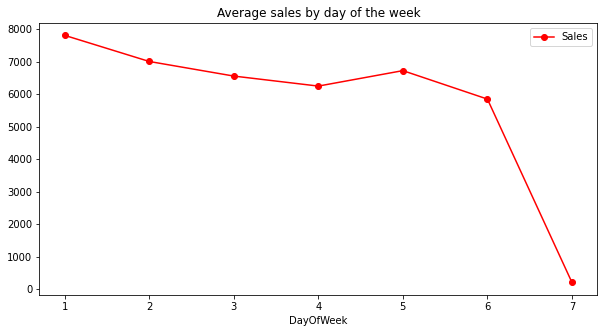

In [51]:
axis = stores_data.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average sales by day of the week')

Text(0.5, 1.0, 'Average number of customers per day of the week')

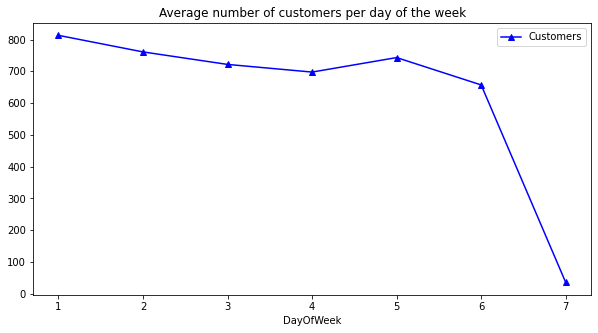

In [52]:
axis = stores_data.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average number of customers per day of the week')

###Sales per Year

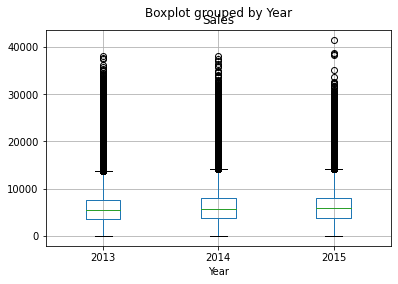

In [53]:
stores_data.boxplot(column='Sales', by='Year',)
plt.show()

###Sales and Customers per months

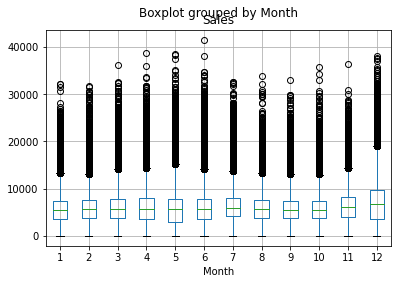

In [54]:
stores_data.boxplot(column='Sales', by='Month',)
plt.show()

Text(0.5, 1.0, 'Average sales per month')

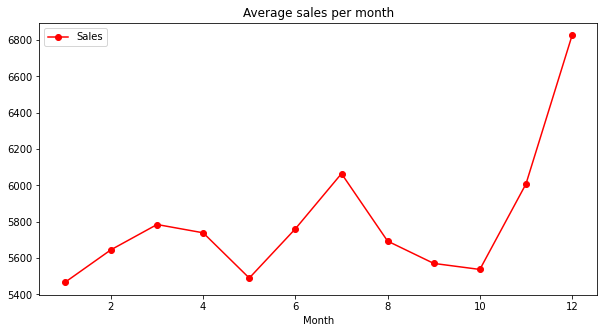

In [55]:
axis = stores_data.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average sales per month')

Text(0.5, 1.0, 'Average customers per month')

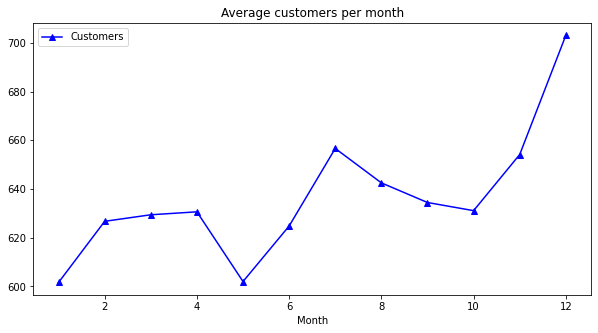

In [56]:
axis = stores_data.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average customers per month')

### Sale and Customers per day

Text(0.5, 1.0, 'Average sales per day')

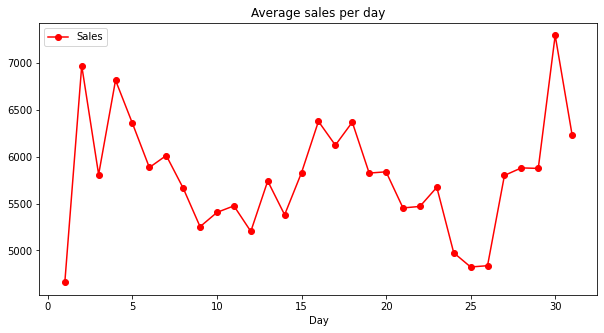

In [57]:
axis = stores_data.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average sales per day')

Text(0.5, 1.0, 'Average number of customers per day')

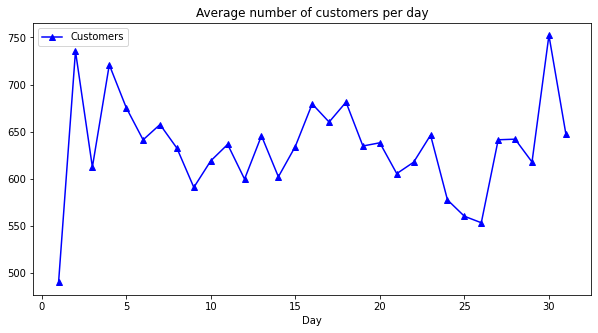

In [58]:
axis = stores_data.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average number of customers per day')

### EDA Findings: 

The best-selling and most frequented type of store is A.

Sales are strongly correlated to the number of customers.

For all stores, promotion leads to increased sales and customers.

Stores open during school holidays have more sales than on normal days.

Each time a store participates in a promotion, it is done for 5 days and twice a month for each store.

More stores are open during school holidays than on public holidays.

Sales increase during Christmas week, this may be due to people buying more beauty products during a Christmas party.

The absence of values ​​in the CompetitionOpenSinceYear/Month entities does not indicate the absence of competition because the CompetitionDistance values ​​are not null where the other two values ​​are null.

After analyzing sales using Fourier decomposition, I discovered that there is a component of seasonality in sales data